<b> This notebook will perform exploratory data analysis, statistical analysis, and finally select most optimal features for model training.

# 1. Problem Statement

In this project, we will utilize a [graduate school admission dataset](https://www.kaggle.com/datasets/mohansacharya/graduate-admissions/data]) from kaggle to develop a graduate school admission estimation system using machine learning. This system will especially aid international students in understanding how much of a realistic chance they have in getting admitted to the university of their choice in the US. 

# 2. Dataset Description

The `Graduate Admission 2` dataset from kaggle is utilized in this project. The dataset consists of several parameters, both numerical and categorical, like `GRE Scores`, `TOEFL Scores`, `University Ranking`, `SOP strength`, `LOR strength`, `Undergraduate GPA`, and `Research Experience`.

Using these set of features, we will train a linear regression model, and a polynomial regression, to predict the chances of admission (`Chance of Admit`). We will utilize Scikit-Learn library to train our ML model.

# 3. Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# 4. Let's Understand the Data 

In [2]:
# reading the csv file using pandas
df = pd.read_csv("dataset.csv")

In [3]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [4]:
# reading the first five rows of the pandas dataframe
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.shape

(400, 9)

We can see that there are 400 rows in the dataframe with 9 columns. Let's see the number of null values in the dataset with respect to each column.

In [6]:
df.isnull().sum() / df.shape[0] * 100

Serial No.           0.0
GRE Score            0.0
TOEFL Score          0.0
University Rating    0.0
SOP                  0.0
LOR                  0.0
CGPA                 0.0
Research             0.0
Chance of Admit      0.0
dtype: float64

This is great! There are no null values in the dataset. If there were null values, we would have to either remove them, or impute them with some proper value. Let's also go through the dataset's information.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


We can see that the dataset is currenly occupying ~24KB of system memory. Also, we can see the datatypes of each feature. Let's get all of the columns from our pandas dataframe.

In [8]:
columns_from_dataframe = df.columns;columns_from_dataframe

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

Now that we have peeked on our data, let's get categorical and numerical features in our dataframe. Based on our dataframe's info we got earlier, we have few different datatypes in our columns: int64 and  float64. Let's identify the int64 columns to identify the categorical features and float64 to identify numerical columns.

In [9]:
int64_datatypes = df.select_dtypes(np.int64);int64_datatypes

,Serial No.,GRE Score,TOEFL Score,University Rating,Research
0,1,337,118,4,1
1,2,324,107,4,1
2,3,316,104,3,1
3,4,322,110,3,1
4,5,314,103,2,0
...,...,...,...,...,...
395,396,324,110,3,1
396,397,325,107,3,1
397,398,330,116,4,1
398,399,312,103,3,0


Well, the column `Serial No.` is kind of useless. It is just a unique identifier which is not relevant to us at all. So,w e can simply drop the column. `GRE Score` on the other hand could be important. But, it has lots of unique values. So, Even though it is not exactly a float data, we will use it in scatterplots and correlation calculation. The same applies to `TOEFL Score`. The interesting and pure categorical columns would be `Univerisity Rating` and `Research`. Also, the `SOP` column is also categorical and ordinal. It represents how strong the applican't SOP is from 0 to 5 with an interval of .5, with 10 unique values.

`University Rating` column is ordinal; the order matters. As you can  see, the values seem to be in order. The higer the order, the more selective a university is. For example, if the rate of a unievrsity if 5, it is much more selective than a univerity with a rating of 1 or 2. This can directly impact admission chances as the chance of admission to a very selective university is generally  very less. 

`Research` is a binary column where 1 indicates that the applicant has some research experience and 0 meanining that the applicant has no research experience. 

`SOP` is a ordinal categorical column which represents how strong an applicant's SOP is.

`LOR` is also an ordinal categorical column which represents how strong an applicant's letter of recommendations are.

In [15]:
# finalizing categorical features
categorical_features = ["University Rating", "Research", "SOP", 'LOR ']

In [16]:
columns_from_dataframe

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [17]:
# finalizing numerical columns
numerical_feaatures = [i for i in columns_from_dataframe if i not in categorical_features]
numerical_feaatures.remove('Serial No.')
numerical_feaatures

['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit ']

Now, let's check if the dataset has any duplicates or not.

In [18]:
# getting the number of duplicate rows in the dataframe
df.duplicated().sum()

0

This is good. We don't have any redundant rows in our dataset. Let's look at the descriptive statistics of our data for numerical columns.

In [19]:
df[numerical_feaatures].describe()

,GRE Score,TOEFL Score,CGPA,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,8.598925,0.724350
std,11.473646,6.069514,0.596317,0.142609
min,290.000000,92.000000,6.800000,0.340000
25%,308.000000,103.000000,8.170000,0.640000
50%,317.000000,107.000000,8.610000,0.730000
75%,325.000000,112.000000,9.062500,0.830000
max,340.000000,120.000000,9.920000,0.970000


We can see that median GRE and TOEFL scores are 317 and 107 respectively. It means that more than 50% of the applicants have a GRE and TOEFL scores higher than 317 and 107, which is very high. Also, the median chance of admit is 0.77, meaning that out of all applicant's in the dataset, almost 77% were successfully admitted. Also, the average CGPA is 8.59, which is a pretty solid score. 

Let's look at some of out categorical columns.

In [20]:
# selecting categorical columns
categorical_df = df[categorical_features]
categorical_df.head()

,University Rating,Research,SOP,LOR
0,4,1,4.5,4.5
1,4,1,4.0,4.5
2,3,1,3.0,3.5
3,3,1,3.5,2.5
4,2,0,2.0,3.0


<b> Let's look at the some categorical columns

In [21]:
# unique values and their percentage count for the column
categorical_df["University Rating"].value_counts() / df.shape[0] * 100

University Rating
3    33.25
2    26.75
4    18.50
5    15.00
1     6.50
Name: count, dtype: float64

Almost 33% of the total applicant's selected university rating's were 3, which is an average rating. Only 15% of the total applicant's applied to very highly selective universities with the rating of 5. It will be interesting to see how many of them actually got admitted. 

In [22]:
# unique values and their percentage count for the column
categorical_df["Research"].value_counts() / df.shape[0] * 100

Research
1    54.75
0    45.25
Name: count, dtype: float64

About 55% of the applicants have some research experience. It will be interesting to see how this relates to the admission chances.

In [23]:
# unique values and their percentage count for the column
df["SOP"].value_counts() / df.shape[0] * 100

SOP
4.0    17.50
3.5    17.50
3.0    16.00
4.5    13.25
2.5    11.75
5.0     9.25
2.0     8.25
1.5     5.00
1.0     1.50
Name: count, dtype: float64

About 17% of the applicants have very strong statement of purpose. It will be interesting to see how this relates to the admission chances.

In [24]:
# unique values and their percentage count for the column
df["LOR "].value_counts() / df.shape[0] * 100

LOR 
3.0    21.25
4.0    19.25
3.5    18.25
4.5    11.25
2.5     9.75
2.0     9.50
5.0     8.75
1.5     1.75
1.0     0.25
Name: count, dtype: float64

About 20% of the applicants have very strong letter of recommendations. It will be interesting to see how this relates to the admission chances.

<b> Let's summarize the dataset.</b>



    1. The dataset has 9 columns and 400 rows.
    
    2. The dataset has no null values in any of the columns.

    3. There are no duplicates in the dataset.

    4. There are 4 pure categorical columns whereas the rest (3) can be considered numerical. 

# 5. Exploratory and Stastistical Data Analysis

In this section, we will perform, univariate, and multivariate data analysis. We will develop histograms, scatterplots, correlation heatmaps, boxplots etc to deeply understand each feature and how it relates with the target column.

In [25]:
print("Our categorical features are: ", categorical_features)
print("Our numerical features are: ", numerical_feaatures)

Our categorical features are:  ['University Rating', 'Research', 'SOP', 'LOR ']
Our numerical features are:  ['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit ']


In [26]:
# we will keep on appending columns that we find most useful for modelling as we analyze each column.
columns_for_modelling = []

## 5.1 Univariate Analysis

<b> 5.1.1 University Rating </b>

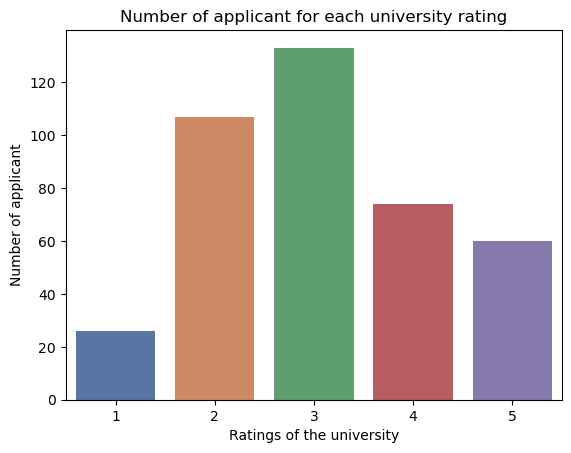

In [27]:
# plotting the number of applicants with their university rating

sns.countplot(x = "University Rating", data = df, color = 'red', palette="deep")
plt.xlabel("Ratings of the university")
plt.ylabel("Number of applicant")
plt.title("Number of applicant for each university rating")
plt.show()

Almost 33% of the total applicant's selected university rating's were 3, which is an average rating. Only 15% of the total applicant's applied to very highly selective universities with the rating of 5. It will be interesting to see how many of them actually got admitted. Very few applicant's applied to low rated universities. This also applies to the highest rated universities. Similarly, most applicants applied to the average rated universities.

This column will definately be very useful for modelling. 

In [28]:
columns_for_modelling.append("University Rating")

<b> 5.1.2 Research </b>

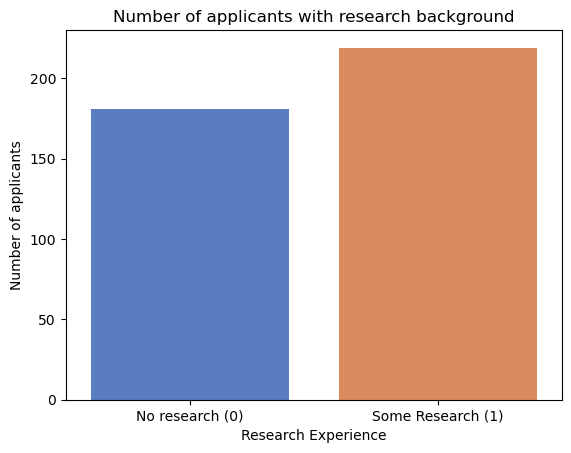

In [29]:
sns.countplot(x="Research", data=df, palette="muted")
plt.xticks(ticks=[0, 1], labels=["No research (0)", "Some Research (1)"])
plt.xlabel("Research Experience")
plt.ylabel("Number of applicants")
plt.title("Number of applicants with research background")
plt.show()

We can see that almost 55% of the applicants have some research background. We will direcly check if there is a relationship between research experience and the chance of admit in further analysis.

<b> 5.1.3 SOP

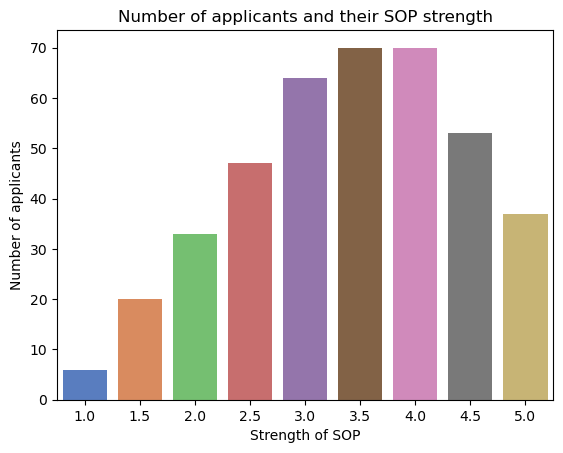

In [32]:
sns.countplot(x="SOP", data=df, palette="muted")
plt.xlabel("Strength of SOP")
plt.ylabel("Number of applicants")
plt.title("Number of applicants and their SOP strength")
plt.show()

We can see that the majority of applicants have their SOP strength around 3-4. Very few applicants have a top tier SOP with maxed out strength (5/5). Also, very few applicants have low quality SOP. 

<b> 5.1.4 Strength of LOR 

In [43]:
# getting the count of LOR strength
count_of_LOR_strength = dict(df["LOR "].value_counts())
count_of_LOR_strength

{3.0: 85, 4.0: 77, 3.5: 73, 4.5: 45, 2.5: 39, 2.0: 38, 5.0: 35, 1.5: 7, 1.0: 1}

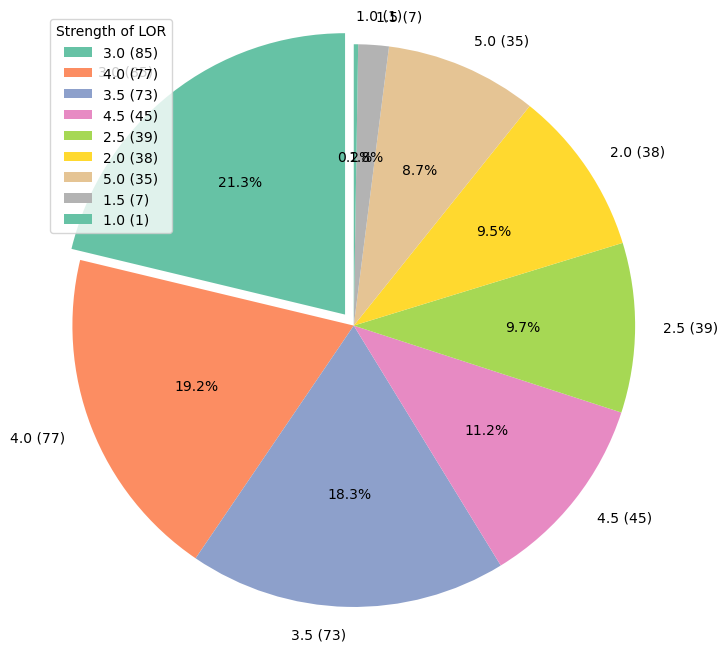

In [45]:
# Pie chart labels and values
labels = list(count_of_LOR_strength.keys())   
values = list(count_of_LOR_strength.values()) 

# Create pie chart
plt.figure(figsize=(8, 8))  
plt.pie(values, labels=[f'{l} ({v})' for l, v in zip(labels, values)], 
        autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"), 
        explode=[0.05] + [0] * (len(labels) - 1))  # Explode the first slice

plt.legend(title="Strength of LOR", loc="best")
plt.axis('equal')
plt.show()

We can clearly see from the pie chart that the majority of applicants (85) had a LOR strength of 3, which is kind of average. Very few applicants had a very high  quality LOR with a strength of 5/5.

<b> 5.1.5 GRE Score </b>

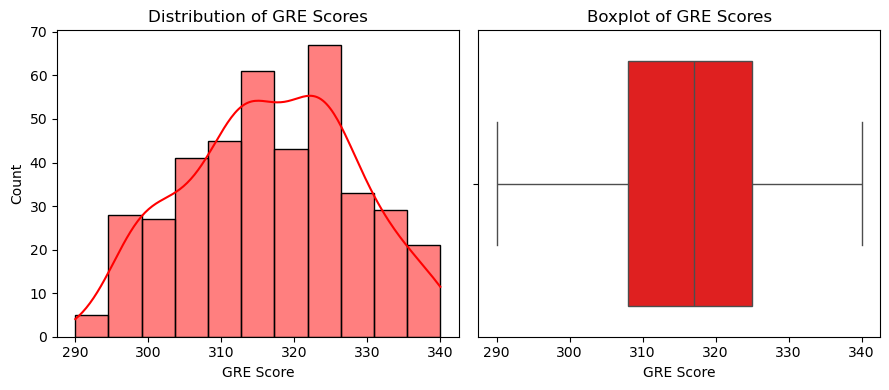

In [55]:
# subplot with 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(9, 4))  

# first plot
sns.histplot(x="GRE Score", data=df, kde=True, color='red', ax=axes[0])
axes[0].set_title("Distribution of GRE Scores")

# second plot
sns.boxplot(x="GRE Score", data=df, ax=axes[1], color='red')
axes[1].set_title("Boxplot of GRE Scores")

plt.tight_layout()
plt.show()


We can see that the above plots that the distribution of the GRE score doe snot seem to be skewed. It look's almost like a normal distribution. There do not seem to be any outliers. 

<b> 5.1.6 TOEFL Score

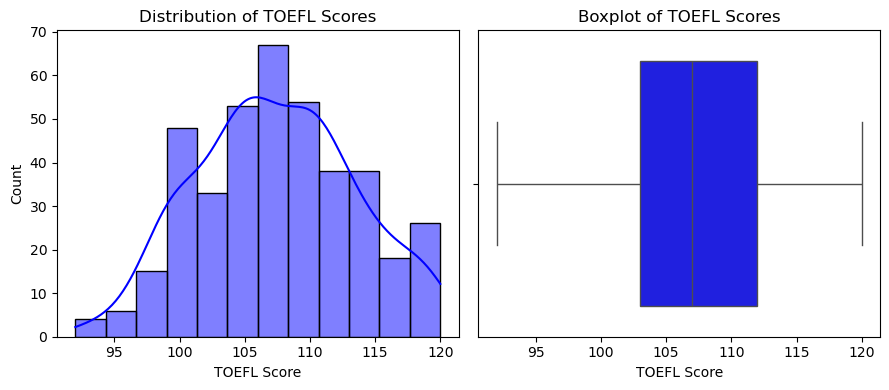

In [54]:
# subplot with 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(9, 4))  

# first plot
sns.histplot(x="TOEFL Score", data=df, kde=True, color='blue', ax=axes[0])
axes[0].set_title("Distribution of TOEFL Scores")

# second plot
sns.boxplot(x="TOEFL Score", data=df, ax=axes[1], color='blue')
axes[1].set_title("Boxplot of TOEFL Scores")

plt.tight_layout()
plt.show()


We can see that the above plots that the distribution of the TOEFL score doe snot seem to be skewed. It look's almost like a normal distribution. There do not seem to be any outliers. The median TOEFL score is in mid 100s and the highest is 120. Similarly, the histogram also shows that the majority of applicant's TOEFL score is centered around 105.

<b> 5.1.7 CGPA

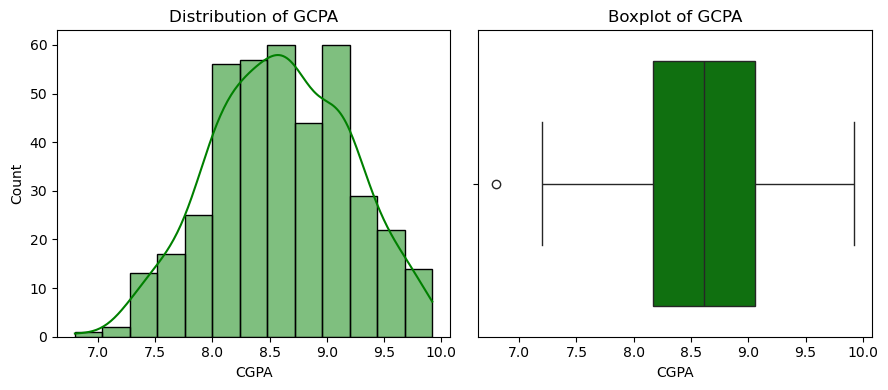

In [53]:
# subplot with 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(9, 4))  

# first plot
sns.histplot(x="CGPA", data=df, kde=True, color='green', ax=axes[0])
axes[0].set_title("Distribution of GCPA")

# second plot
sns.boxplot(x="CGPA", data=df, ax=axes[1], color='green')
axes[1].set_title("Boxplot of GCPA")

plt.tight_layout()
plt.show()


The distribution of the CGPA is also very similar to the TOEFL and GRE scores. The only exception is that there is an outlier so that the distribution is very slightly left skewed. One of the applicant has cumulative undergradate GPA less than 7. The median CGPA is is high 8s. It will be very interesting to see how CGPA impacts the chance of admit.

<b> 5.1.8 Chance of Admit

In [57]:
numerical_feaatures

['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit ']

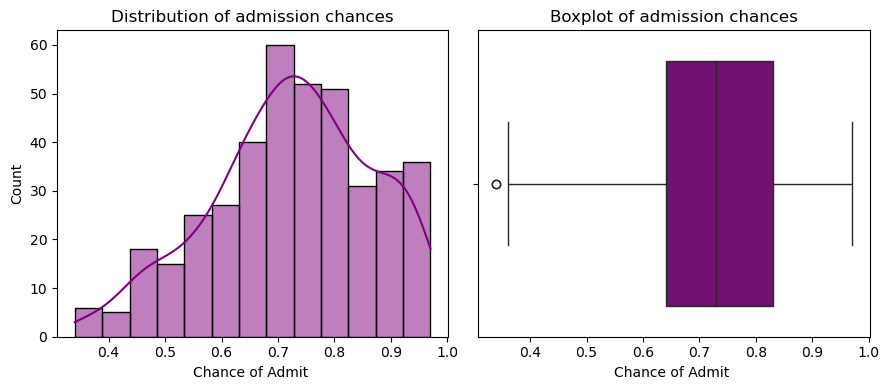

In [58]:
# subplot with 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(9, 4))  

# first plot
sns.histplot(x="Chance of Admit ", data=df, kde=True, color='purple', ax=axes[0])
axes[0].set_title("Distribution of admission chances")

# second plot
sns.boxplot(x="Chance of Admit ", data=df, ax=axes[1], color='purple')
axes[1].set_title("Boxplot of admission chances")

plt.tight_layout()
plt.show()


The admission chances looks left skewed slightly with an outlier applicant with less than 40% chances of getting admitted. The median chance of an applicant getting admitted in the dataset is around 75%, which can be seen in the boxplot. Some applicant even have their admission chances in high 90s. Could this be due to them having high CGPA, LORs, SOP, TOEFL score and other factors? We will do multivariate analysis in the next section below to understand how each variable factors in the admission descision.

# 5.2 Multivariate Analysis